# King James Bible Fun Facts With Python

This notebook is nothing a tutorial/demo of the basic functionalities of pandas and matplotlib combined with basics skills that any data scientist should have.
For the following exercises we will work with the King James Bible, in short, because:
- It is classic text, world-wide known and, extensive enough to provide data for charts and stats.
- It is free
- Can be freely downloaded from  https://openbible.com/textfiles/kjv.txt
- The file format can be easily read and transformed

From the URL above, you will get a file with the following general structure: Book Chapter:Verse\tText

Example:

'''html
Genesis 7:24	And the waters prevailed upon the earth an hundred and fifty days.
Genesis 8:1	And God remembered Noah, and every living thing, and all the cattle that [was] with him in the ark: and God made a wind to pass over the earth, and the waters asswaged;
Genesis 8:2	The fountains also of the deep and the windows of heaven were stopped, and the rain from heaven was restrained;
Genesis 8:3	And the waters returned from off the earth continually: and after the end of the hundred and fifty days the waters were abated.
'''

## A Few Basic Functions

In [415]:
import re
import pandas as pd
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import numpy as np
import random
from itables import init_notebook_mode
# 

# 1) A view easy functions to clean strings and extract information
def count_characters(line):
    """Remove white spaces and count"""
    # remove strange chars
    line = clean_up_verse(line)
    # remove white spaces
    line = line.replace(' ', '')

    return len(line)


def clean_up_verse(line, include_white_space=False):
    """Remove non readable characters"""
    for char in ('.', ';', ',', '!', '[', ']', '?',':', '"', "'"):
        line = line.replace(char, '')

    if include_white_space:
        line = line.replace(' ', '')

    return line.lower()


def get_verse_text(line):
    """Extracts the verse text"""
    pattern = r"\t.*"
    matches = re.findall(pattern, line)
    for match in matches:
        # remove \t
        return match.replace('\t', '')


def get_verse_number(line):
    """Extracts the verse with a regular expression.
    Technically identical to get_chapter() but set aside for consistency
    and readability reasons"""
    pattern = r"\d+:\d+\b"
    matches = re.findall(pattern, line)
    for match in matches:
        return match.split(':')[1]


def get_chapter_number(line):
    """Extracts the chapter with a regular expression"""
    pattern = r"\d+:\d+\b"
    matches = re.findall(pattern, line)
    for match in matches:
        return match.split(':')[0]


def get_book_name(line):
    """Extracts the book name by splitting the line on the first blank space"""
    book = line.split()[0]
    # some books start with a number like 1 Thessalonians
    if book.isdigit():
        # we need the first two words in this case
        book = line.split()[0] + ' ' + line.split()[1]

    return book

# Reformat The Data

In [416]:
bible = {}

with open('king_james_bible.txt', 'r') as file:
    i = 0
    # the first two lines in the file are garbage, skip them
    for line in file:
        if 0 == i or 1 == i:
            i = i + 1
            continue

        book = get_book_name(line)
        if book not in bible:
            bible[book] = {}

        chapter = get_chapter_number(line)
        if chapter not in bible[book]:
            bible[book][chapter] = {}

        # verses are unique, we do not need to check for the key
        bible[book][chapter][get_verse_number(line)] = get_verse_text(line)

        i = i + 1

# Print one line to check the data structure

for book in bible:
    for chapter in bible[book]:
        for verse in bible[book][chapter]:
            text = bible[book][chapter][verse]
            print("{} {} {} = {}".format(book, chapter, verse, text))
            break
        break        
    break

Genesis 1 1 = In the beginning God created the heaven and the earth.


### How Many Books Are There In The Bible?

In [417]:
# 3) How many books in the Bible?
print('\nBooks in the bible: {}'.format(len(bible)))


Books in the bible: 66


### Verses Per Book


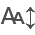

Book  Verses
0       Genesis    1533
1        Exodus    1213
2     Leviticus     859
3       Numbers    1288
4   Deuteronomy     959
..          ...     ...
61       1 John     105
62       2 John      13
63       3 John      14
64         Jude      25
65   Revelation     404

[66 rows x 2 columns]

In [418]:

verses = {}
for book in bible:
    for chapter in bible[book]:
        for verse in bible[book][chapter]:
            if book not in verses:
                verses[book] = 1
            else:
                verses[book] = verses[book] + 1

# Sort the dictionary by value in descending order
verses = pd.DataFrame(verses.items(), columns=['Book', 'Verses'])


# Print out dataset in a nice, interactive table
init_notebook_mode(all_interactive=True)
verses


In [419]:
# Describe the dataset considering only the verses count
# "Count" is the number of books
verses[['Verses']].describe()

Verses
count    66.000000
mean    471.242424
std     504.652510
min      13.000000
25%      86.000000
50%     216.500000
75%     820.500000
max    2461.000000

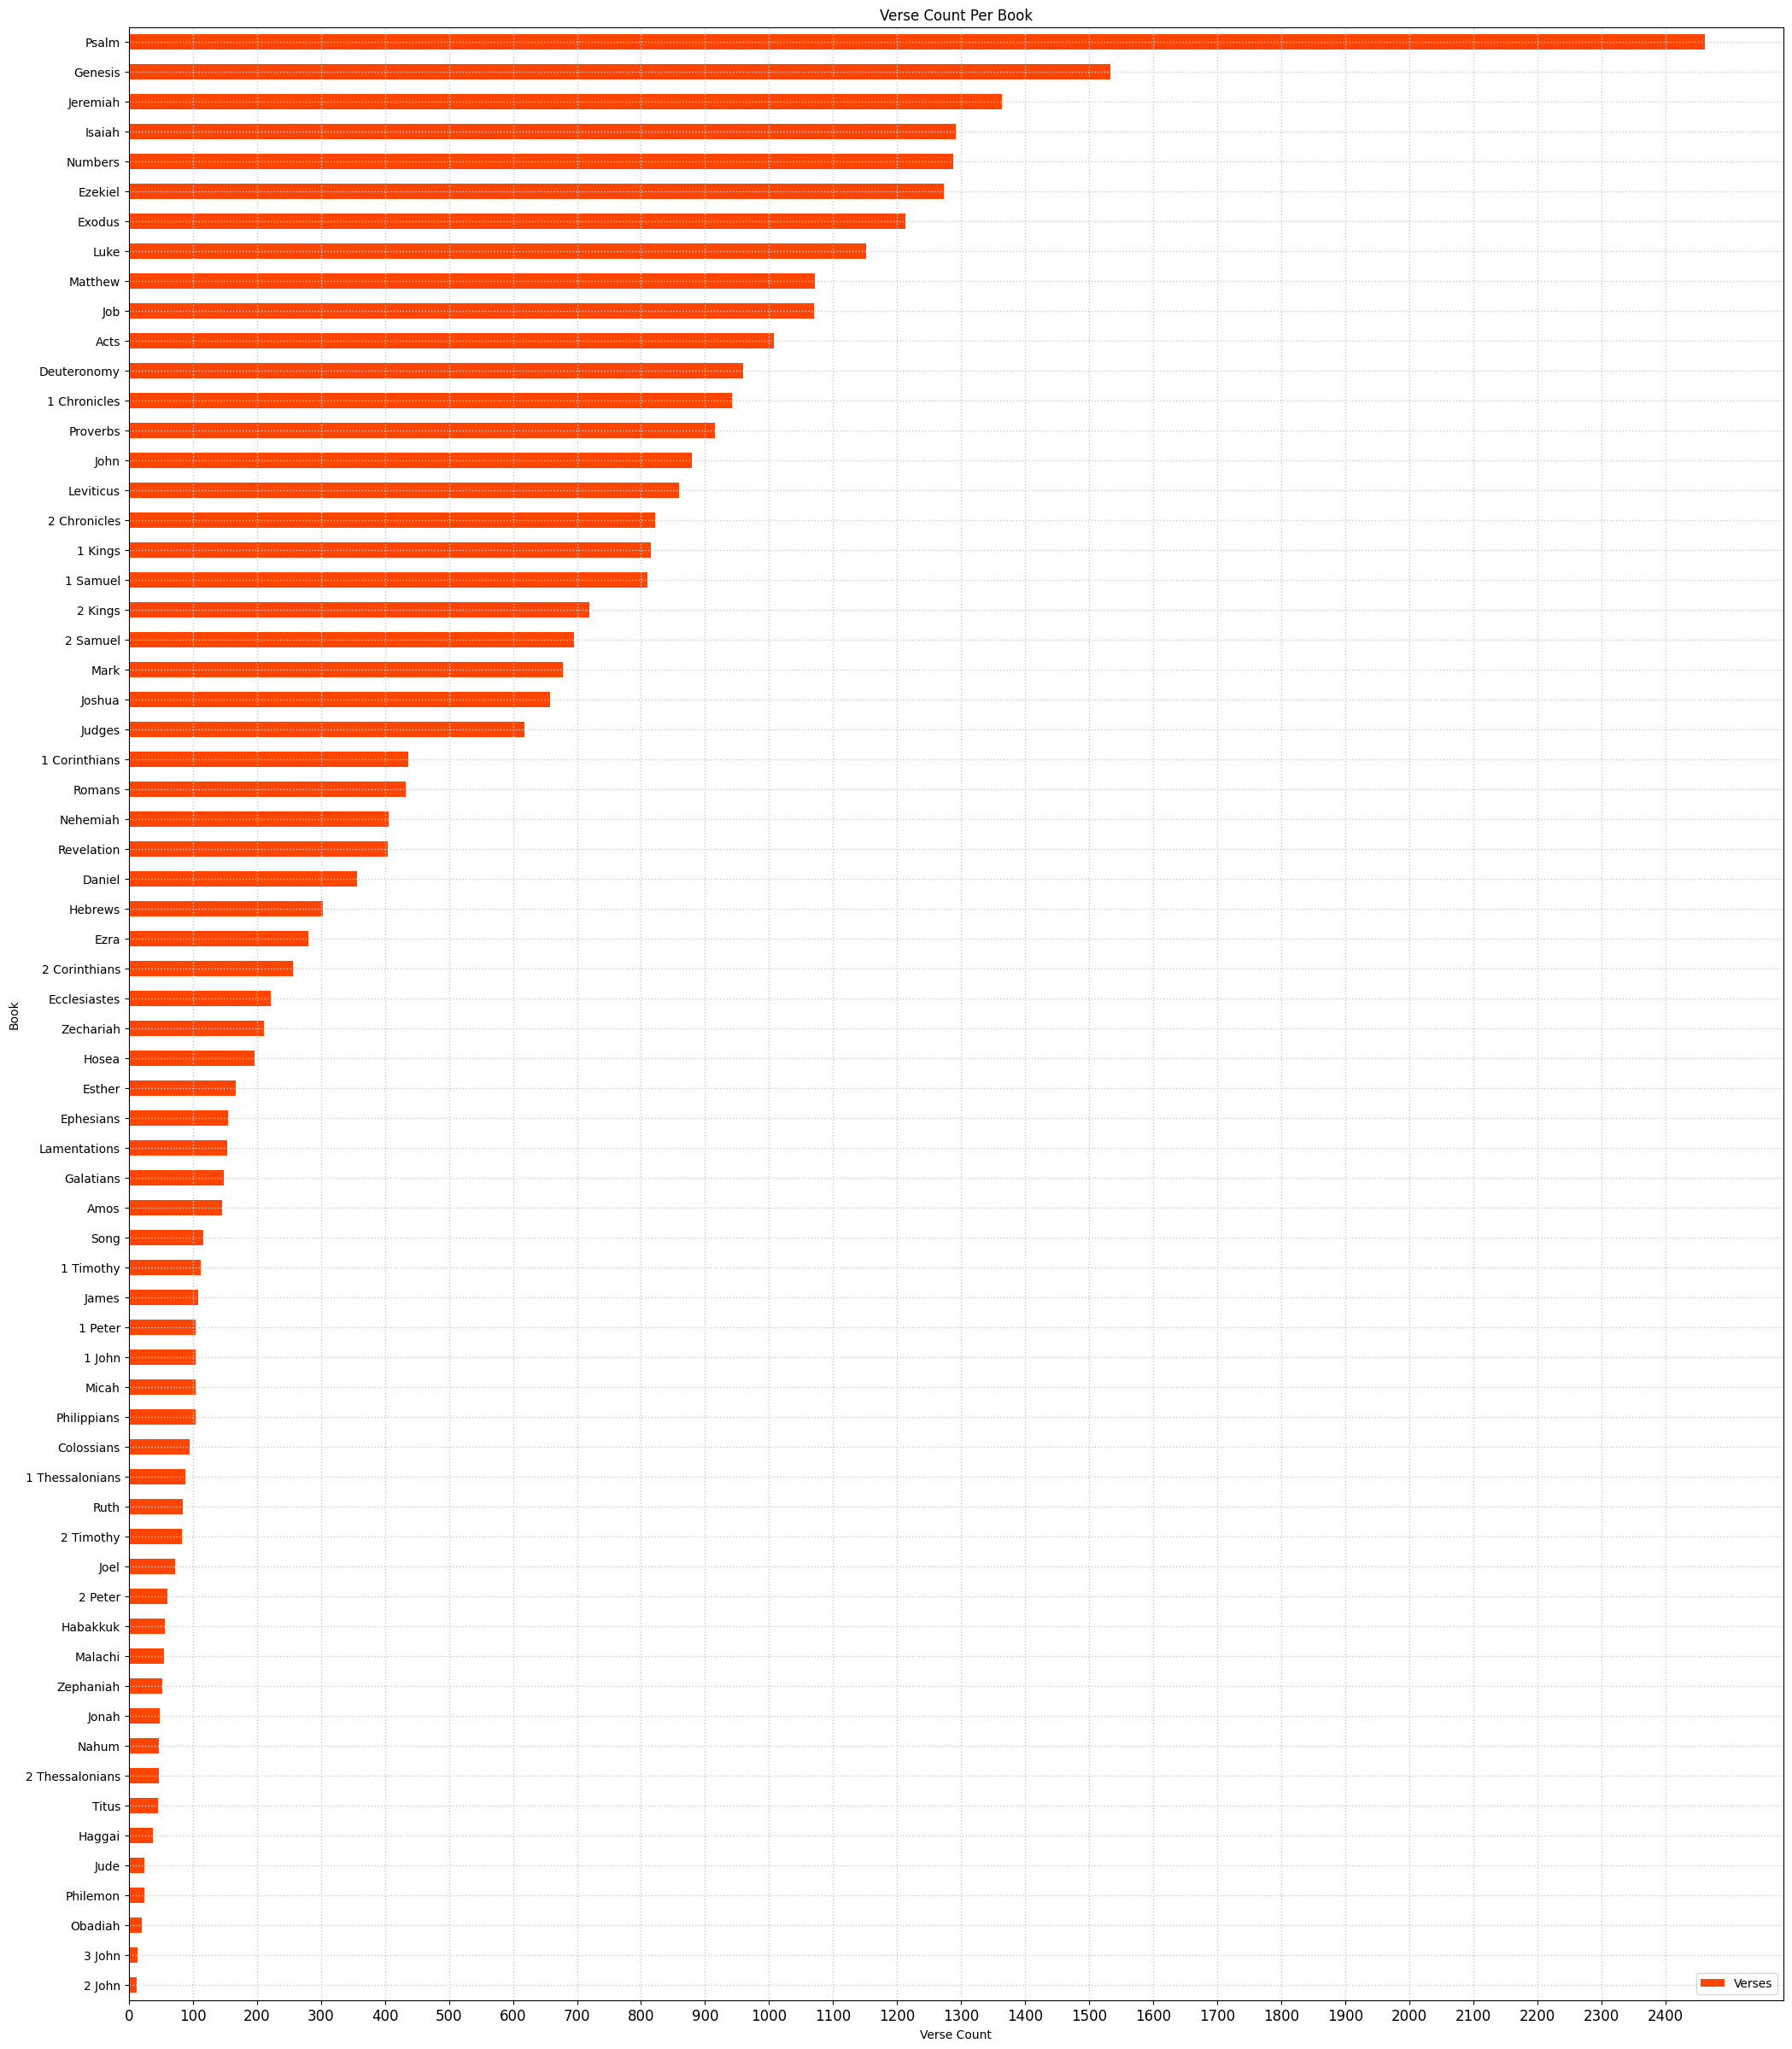

In [420]:
# Quick plot
srtd = verses.sort_values('Verses')
srtd.plot.barh(x='Book', y='Verses', color={'orangered'},figsize=(25,30))
plt.xticks(range(0,srtd.Verses.max(),100), fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True, color = "#CCC", linewidth = "1", linestyle = "dotted")
plt.title('Verse Count Per Book')
plt.ylabel('Book')
plt.xlabel('Verse Count')
plt.show()

### Reading Time

In [421]:

word_count = {}

for book in bible:
    for chapter in bible[book]:
        for verse in bible[book][chapter]:
            verse_words = clean_up_verse(bible[book][chapter][verse]).split(' ')
            if book not in word_count:
                word_count[book] = len(verse_words)
            else:
                word_count[book] = word_count[book] + len(verse_words)

# Sort the dictionary by value in descending order
word_count = pd.DataFrame({'Book':word_count.keys(),'Words':word_count.values()})
word_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Book    66 non-null     object
 1   Words   66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [422]:
word_count.describe()

Words
count     66.000000
mean   11980.090909
std    12501.464246
min      294.000000
25%     1992.500000
50%     5849.000000
75%    20541.250000
max    43738.000000

In [423]:
word_count

Book  Words
0       Genesis  38262
1        Exodus  32686
2     Leviticus  24541
3       Numbers  32896
4   Deuteronomy  28352
..          ...    ...
61       1 John   2517
62       2 John    298
63       3 John    294
64         Jude    608
65   Revelation  11995

[66 rows x 2 columns]

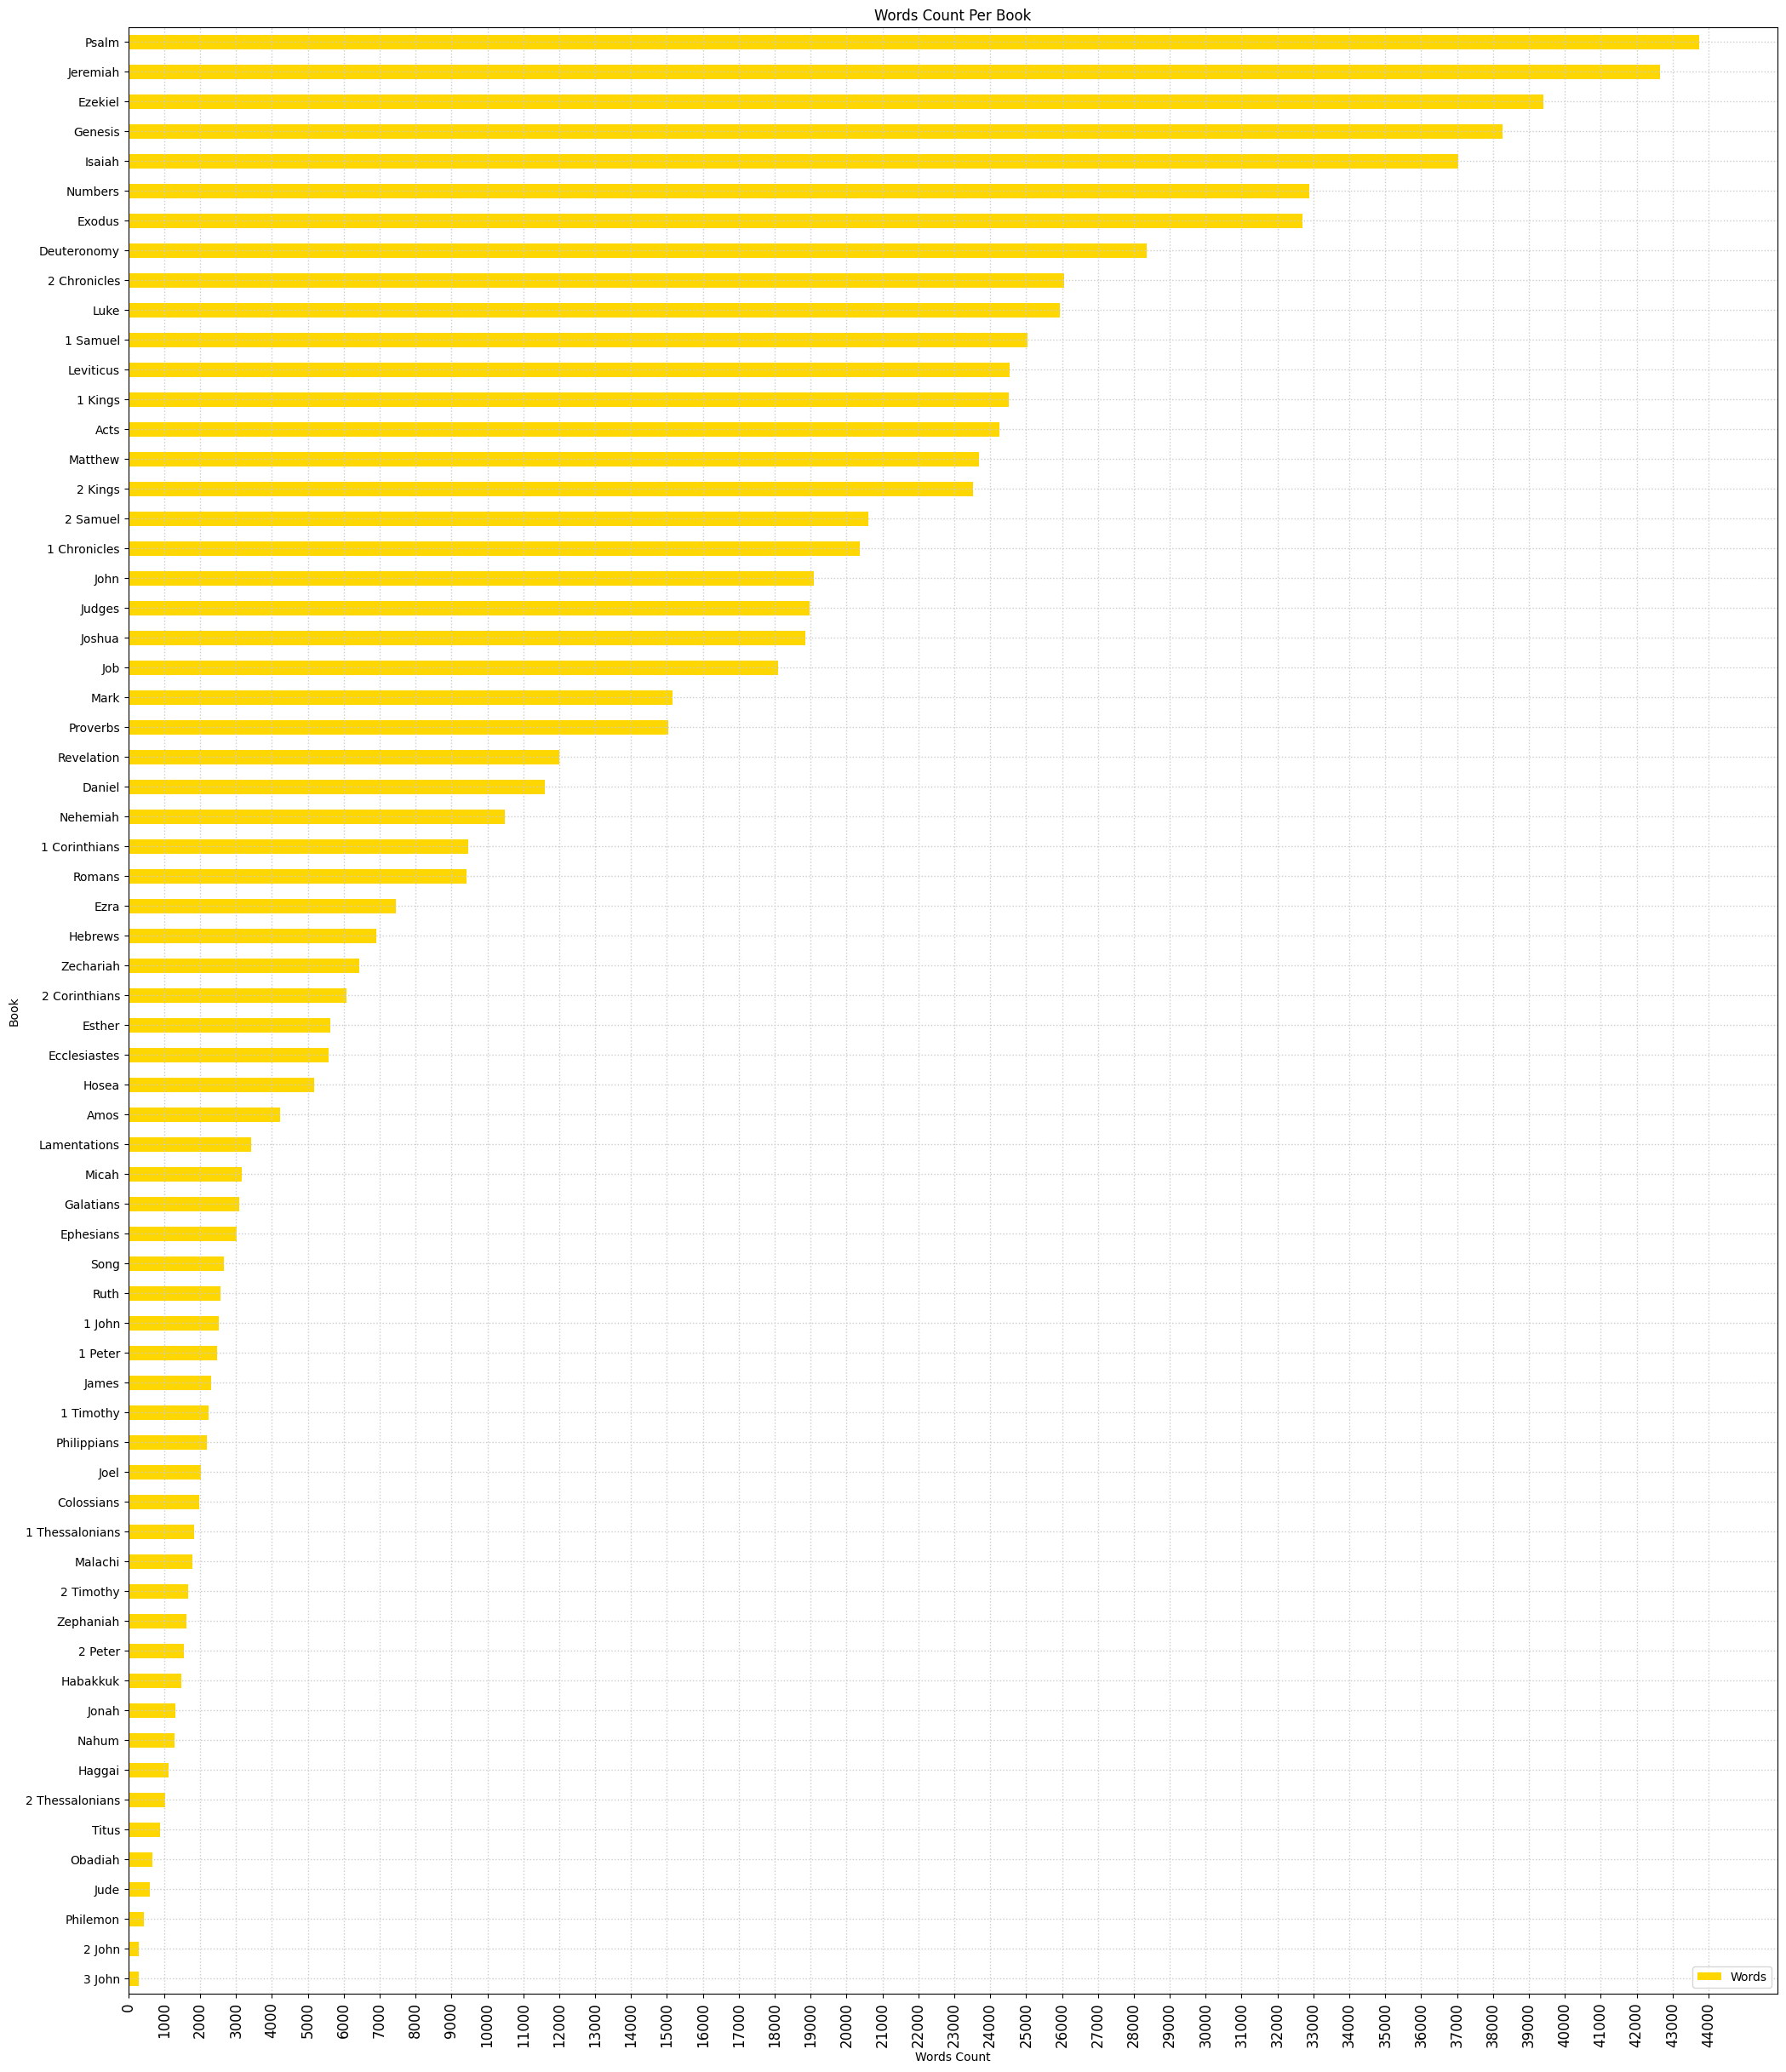

In [424]:
reading_t = word_count.sort_values('Words', ascending=True)
reading_t.plot.barh(x='Book', y='Words', color={'gold'},figsize=(25,30))
plt.xticks(range(0,reading_t.Words.max()+1000,1000), fontsize=12, rotation=90)
plt.yticks(fontsize=10)
plt.grid(True, color = "#CCC", linewidth = "1", linestyle = "dotted")
plt.title('Words Count Per Book')
plt.ylabel('Book')
plt.xlabel('Words Count')
plt.show()


In [425]:
# How long would it take to read the whole bible?
total_minutes = word_count.Words.sum()//200
# Get hours with floor division
hours = int(total_minutes // 60)
# Get additional minutes with modulus
minutes = int(total_minutes % 60)
print('\nTotal Estimated Reading Time: {} hours {} minutes'.format(hours, minutes))           


Total Estimated Reading Time: 65 hours 53 minutes


### Estimated Reading Time Per Book

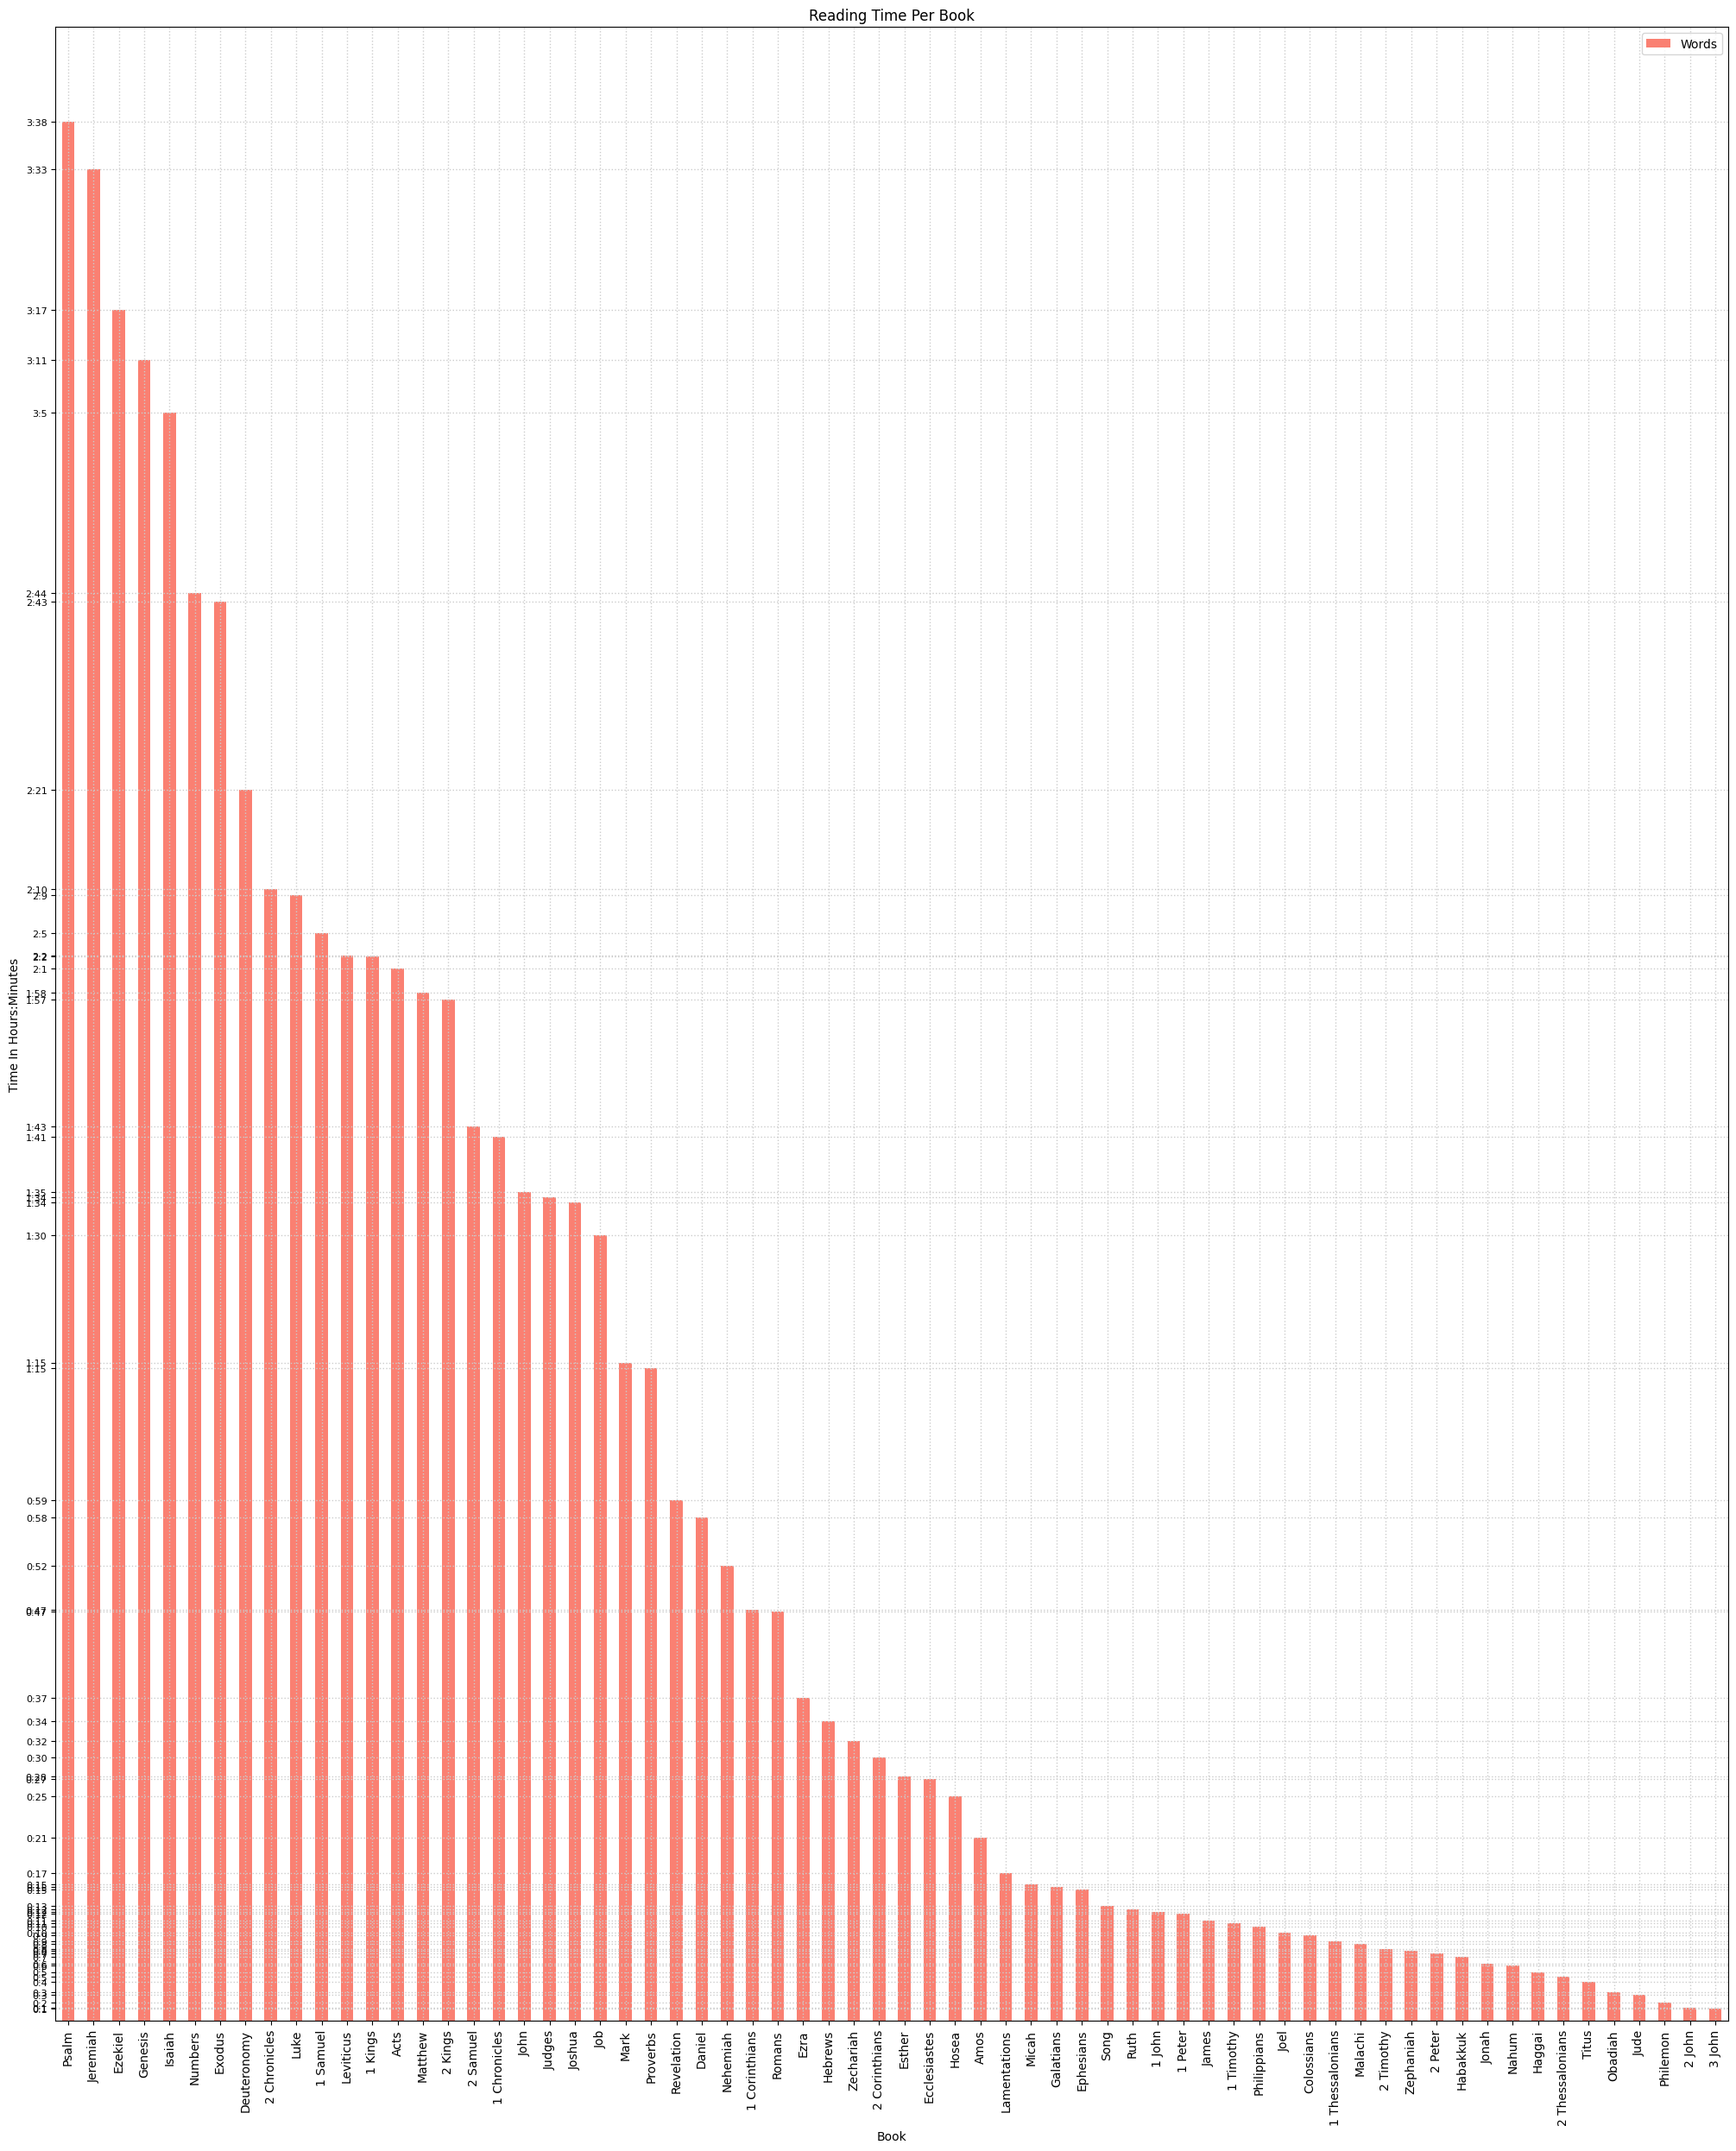

In [426]:
reading_time = word_count.sort_values('Words', ascending=False)
reading_time.plot.bar(x='Book', y='Words', color={'salmon'},figsize=(25,30))
# Estimated reading time is 200 words per minute
def to_time(x):
    total_minutes = x//200
    # Get hours with floor division
    hours = int(total_minutes // 60)
    # Get additional minutes with modulus
    minutes = int(total_minutes % 60)
    return('{}:{}'.format(hours, minutes)) 


plt.yticks(reading_time.Words, [to_time(x) for x in reading_time.Words], fontsize=8, rotation=0)
plt.xticks(fontsize=10)
plt.grid(True, color = "#CCC", linewidth = "1", linestyle = "dotted")
plt.title('Reading Time Per Book')
plt.ylabel('Time In Hours:Minutes')
plt.xlabel('Book')
plt.show()

### Words Per Book

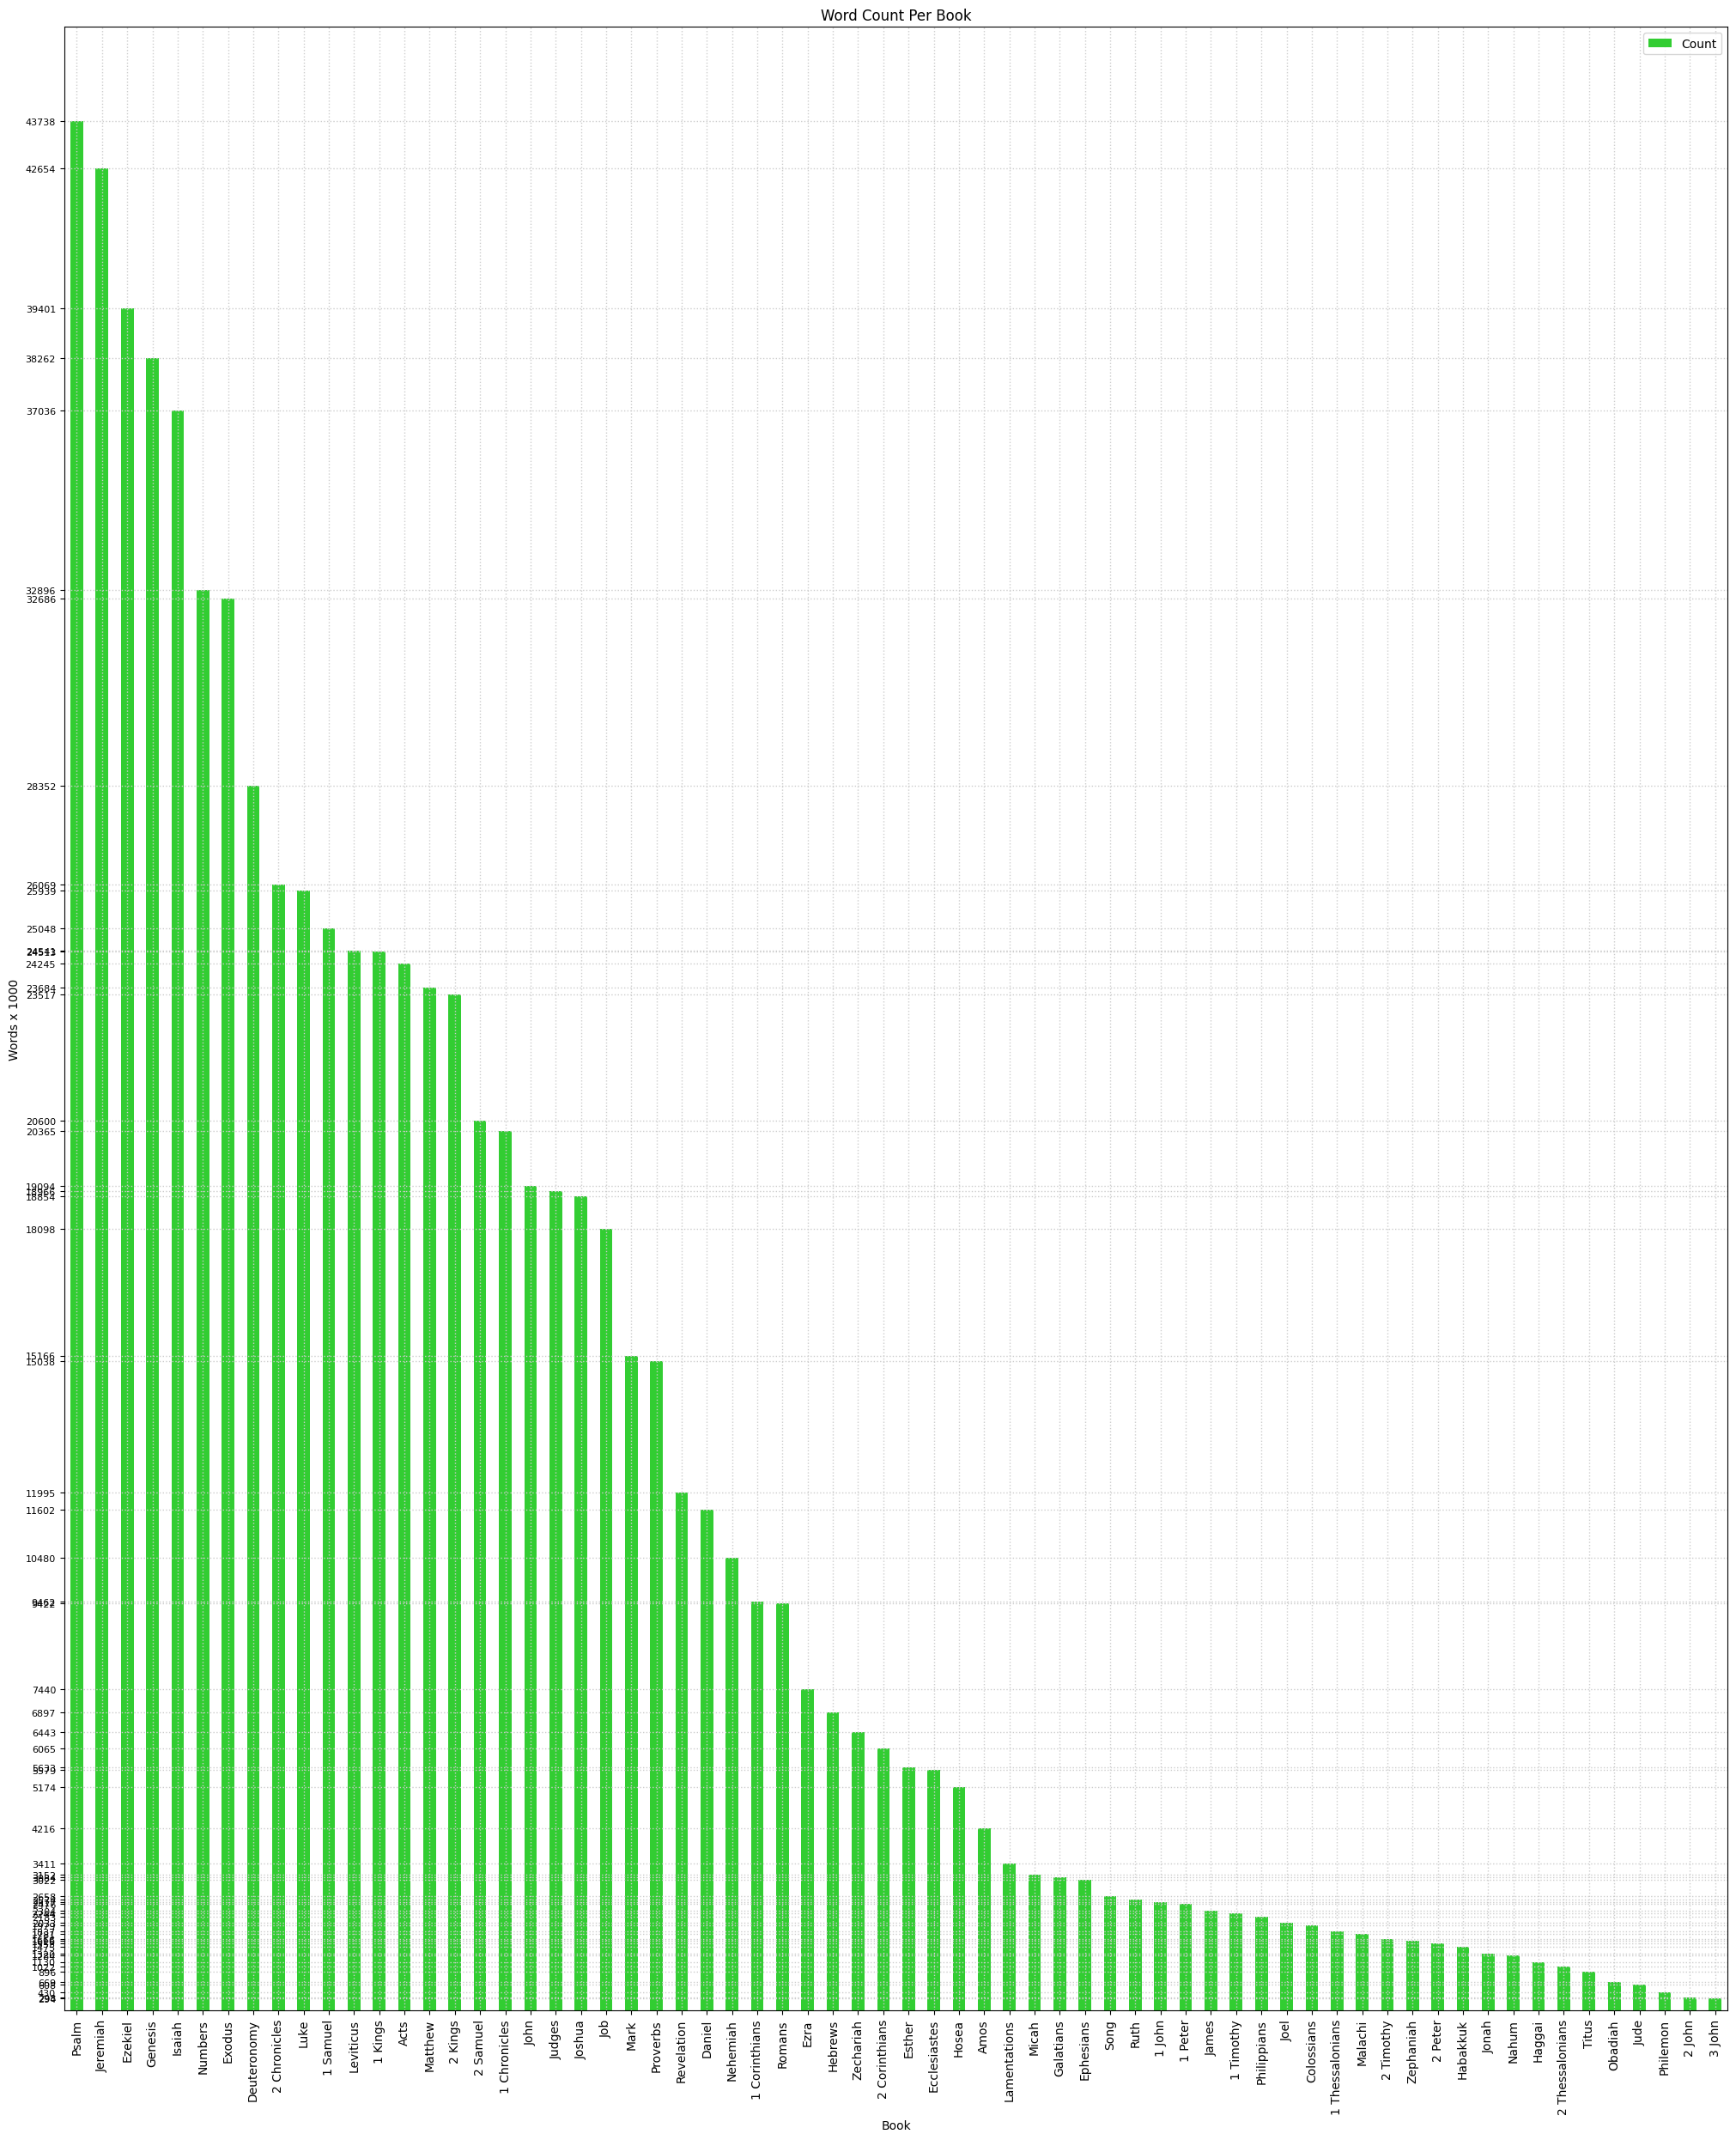

In [427]:

word_count = {}

for book in bible:
    for chapter in bible[book]:
        for verse in bible[book][chapter]:
            verse_words = clean_up_verse(bible[book][chapter][verse]).split(' ')
            if book not in word_count:
                word_count[book] = len(verse_words)
            else:
                word_count[book] = word_count[book] + len(verse_words)

# Sort the dictionary by value in descending order
word_count = pd.DataFrame({'Book':word_count.keys(),'Count':word_count.values()})
word_count = word_count.sort_values('Count', ascending=False)
word_count.plot.bar(x='Book', y='Count', color={'limegreen'},figsize=(25,30))

plt.yticks(word_count.Count, [x for x in word_count.Count], fontsize=8, rotation=0)
plt.xticks(fontsize=10)
plt.grid(True, color = "#CCC", linewidth = "1", linestyle = "dotted")
plt.title('Word Count Per Book')
plt.ylabel('Words x 1000')
plt.xlabel('Book')
plt.show()

### Overall Word Distribution: Top 50 Most Recurrent Words

In [ ]:
words = {}

for book in bible:
    for chapter in bible[book]:
        for verse in bible[book][chapter]:
            for word in clean_up_verse(bible[book][chapter][verse]).split(' '):
                if word not in words:
                    words[word] = 1
                else:
                    words[word] = words[word] + 1

# Sort alphabetically
words = {key: value for key, value in sorted(words.items())}
# Sort the dictionary by value in descending order
words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
# This could be avoided by working with dataframes directly

df = pd.DataFrame({
    'Word': [word for word in list(words)[:51]],
    'Count': [words[word] for word in list(words)[:51]]
})
df = df.sort_values(by=['Count'])
plt.grid(True, color="#CCC", linewidth="1", linestyle="dotted", zorder=0)
plt.barh(y=df.Word,
         width=df.Count,
         color=(random.random(), random.random(), random.random())
         )
# show ticks displaced to the right
plt.yticks([i + 0.1 for i, _ in enumerate(df.Word)], df.Word, rotation=0, fontsize=7)

# asking python to show us our plot
plt.rcParams["figure.figsize"] = (30, 10)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 50 Overall Word Count')

# Show values in the bars
for index, value in enumerate(df.Count):
    plt.text(value, index,
             str(value), fontsize=6)

plt.show()


### Word Distribution Per Book

In [ ]:

words = {}

for book in bible:
    for chapter in bible[book]:
        if chapter not in words:
            words[book] = {}

        for verse in bible[book][chapter]:
            for word in clean_up_verse(bible[book][chapter][verse]).split(' '):
                if word not in words[book]:
                    words[book][word] = 1
                else:
                    words[book][word] = words[book][word] + 1

# words = pd.DataFrame(words.items(), columns=['Book', 'Word'])
# display(HTML(words.to_html()))
df = pd.DataFrame(words)
#df.sort_values(0, ascending=True)
# display(HTML(df.to_html()))
df